# Explore here

I can type and hit `shift-enter` to run this cell

## This is the Logistic Regression Machine Learning project

This project is exploring a customer dataset, and our task is to identify customers who are more likely to invest in a long-term deposit so we can create a "directory" of potential customers and call them.

In [1]:
# Your code here
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=413&path=bank-marketing-campaign-data.csv", sep=';')

main_df.head(3)
#main_df.to_csv('../data/my_df.csv')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
main_df.shape

(41188, 21)

In [4]:
# how many people are "yes" or "no" in this dataset?
main_df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [5]:
4640 / (36548 + 4640)

0.11265417111780131

### Let's explore the data

In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
main_df.isna().sum().sum()

np.int64(0)

In [8]:
main_df[main_df['y']=='no'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000
mean,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
std,9.898132,207.096293,2.873438,120.656868,0.409199,1.482932,0.558993,4.391155,1.638187,64.571979
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,95.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000
50%,38.000000,163.500000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5195.800000
75%,47.000000,279.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,95.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
main_df[main_df['y']=='yes'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Correlations and heatmaps

<Axes: >

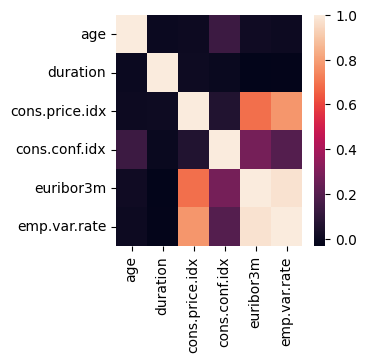

In [10]:
plt.figure(figsize=(3,3))
sns.heatmap(main_df[['age','duration', "cons.price.idx",'cons.conf.idx', 'euribor3m','emp.var.rate']].corr())

<Axes: xlabel='emp.var.rate', ylabel='euribor3m'>

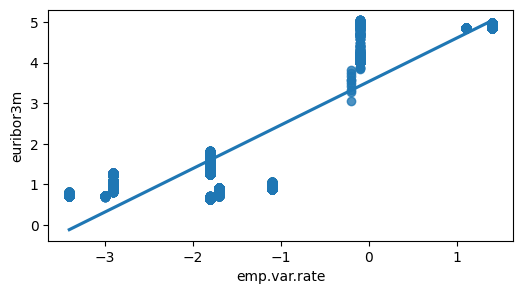

In [11]:
plt.figure(figsize=(6,3))
sns.regplot(data=main_df, x='emp.var.rate', y='euribor3m')

In [12]:
def job_maker(x):
    if x in ['admin.', 'blue-collar','technician']:
        return x
    else: return "other"

main_df['job'] = main_df['job'].apply(job_maker)

In [13]:
main_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,other,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,other,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,other,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,other,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<Axes: xlabel='age', ylabel='duration'>

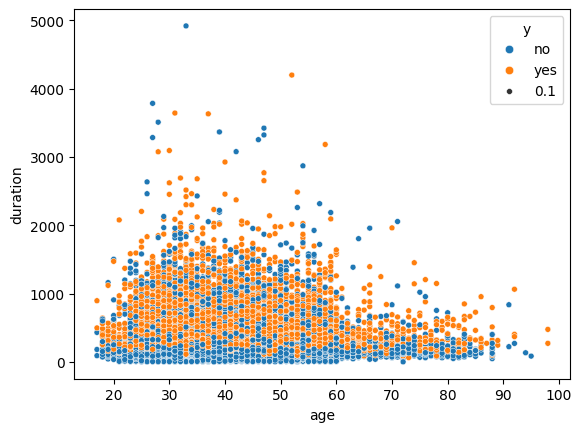

In [14]:
sns.scatterplot(data=main_df, x='age', y='duration', hue='y', size=0.1)

It looks like customers who were contacted between 2 and 4 times (in the previous campaign) had a success rate of approximately 40%

In [15]:
main_df.groupby('previous')['poutcome'].value_counts(normalize=True)

previous  poutcome   
0         nonexistent    1.000000
1         failure        0.810349
          success        0.189651
2         failure        0.575597
          success        0.424403
3         success        0.592593
          failure        0.407407
4         success        0.571429
          failure        0.428571
5         success        0.833333
          failure        0.166667
6         success        0.800000
          failure        0.200000
7         success        1.000000
Name: proportion, dtype: float64

In [16]:
main_df['age'].min()

np.int64(17)

"Age" tells us *something* about the distribution of last year's campaign but I'm not exactly sure what

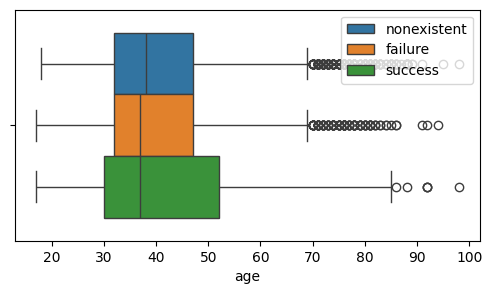

In [17]:
plt.figure(figsize=(6,3))
sns.boxplot(data = main_df, x='age', hue = 'poutcome')
plt.legend(loc='upper right');

<Axes: xlabel='age', ylabel='Probability'>

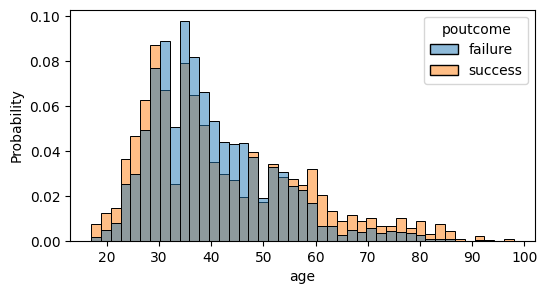

In [18]:
plt.figure(figsize=(6,3))
sns.histplot(data = main_df[main_df['poutcome']!='nonexistent'], x='age', hue = 'poutcome', 
             stat='probability', common_norm = False)


Days of the week and duration of call

In [19]:
day_order = ["mon", "tue", "wed", "thu", "fri",]

temp_df = main_df.groupby('day_of_week')['duration'].mean().reset_index()
temp_df['day_of_week'] = temp_df['day_of_week'].map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5})

temp_df.sort_values('day_of_week').reset_index(drop=True)

#ax = main_df.set_index(field).loc[day_order].plot(kind="bar", legend=False)
#ax.set_ylabel("Value")

,day_of_week,duration
0,1,246.568358
1,2,260.455995
2,3,265.883206
3,4,265.674591
4,5,252.748818


In [20]:
round(main_df[main_df['poutcome']!='nonexistent'].groupby(['day_of_week','poutcome'])['duration'].mean())

day_of_week  poutcome
fri          failure     252.0
             success     310.0
mon          failure     229.0
             success     324.0
thu          failure     258.0
             success     325.0
tue          failure     247.0
             success     337.0
wed          failure     255.0
             success     305.0
Name: duration, dtype: float64

In [21]:
main_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,other,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,other,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,other,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,other,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Having a university degree seems to be associated with a higher rate of success, but we need to do more hypothesis testing to be sure.

In [22]:
main_df.groupby('education')['y'].value_counts(normalize=True)

education            y  
basic.4y             no     0.897510
                     yes    0.102490
basic.6y             no     0.917976
                     yes    0.082024
basic.9y             no     0.921754
                     yes    0.078246
high.school          no     0.891645
                     yes    0.108355
illiterate           no     0.777778
                     yes    0.222222
professional.course  no     0.886515
                     yes    0.113485
university.degree    no     0.862755
                     yes    0.137245
unknown              no     0.854997
                     yes    0.145003
Name: proportion, dtype: float64

<Axes: xlabel='euribor3m'>

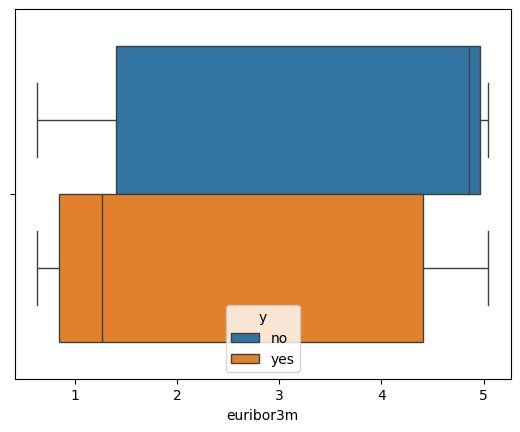

In [23]:
sns.boxplot(data = main_df, x='euribor3m', hue = 'y')

<Axes: xlabel='euribor3m', ylabel='Probability'>

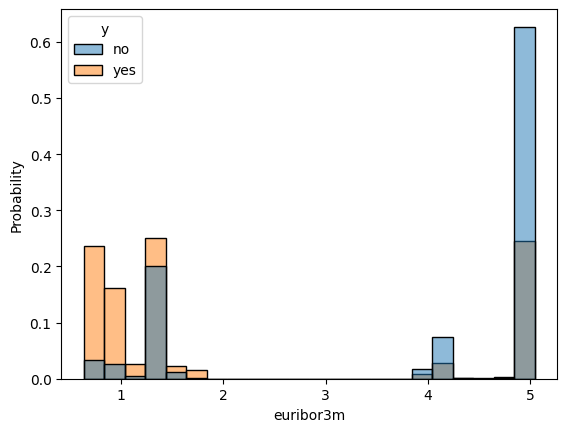

In [24]:
sns.histplot(data = main_df, x='euribor3m', hue = 'y',
             common_norm = False, stat='probability')

In [25]:
main_df['low_interest_rates'] = main_df['euribor3m'].apply(lambda x: x < 3)
main_df['college_grad?'] = main_df['education'].apply(lambda x: x == 'university.degree')

In [26]:
main_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,low_interest_rates,college_grad?
0,56,other,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
1,57,other,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
2,37,other,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
4,56,other,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False


<Axes: xlabel='pdays', ylabel='Count'>

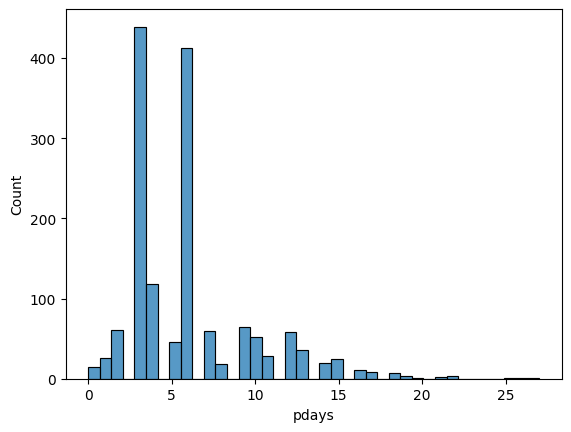

In [27]:
sns.histplot(main_df[main_df['pdays']!=999]['pdays'])

In [28]:
def marital_status(x):
    if x == 'divorced':
        return 'single'
    elif x == 'unknown':
        return 'married'
    else: return x

main_df['marital'] = main_df['marital'].apply(marital_status)

In [29]:
main_df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,low_interest_rates,college_grad?
0,56,other,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
1,57,other,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
2,37,other,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False


In [30]:
main_df['default'] = main_df['default'].map({'unknown':'unknown',
                        'no': 'no',
                        'yes':'unknown'})

In [31]:
main_df.groupby('month')['y'].value_counts(normalize=True).reset_index()

,month,y,proportion
0,apr,no,0.795213
1,apr,yes,0.204787
2,aug,no,0.893979
3,aug,yes,0.106021
4,dec,no,0.510989
5,dec,yes,0.489011
6,jul,no,0.909534
7,jul,yes,0.090466
8,jun,no,0.894885
9,jun,yes,0.105115


/home/vscode/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='duration', ylabel='Count'>

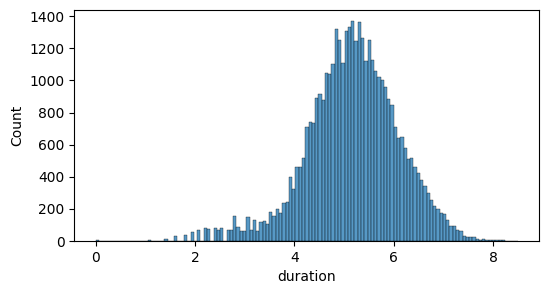

In [32]:
plt.figure(figsize=(6,3))
sns.histplot(np.log(main_df['duration']))

In [33]:
main_df['duration'] = np.log(main_df['duration']+1)

In [34]:
main_df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,low_interest_rates,college_grad?
0,56,other,married,basic.4y,no,no,no,telephone,may,mon,5.568345,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
1,57,other,married,high.school,unknown,no,no,telephone,may,mon,5.010635,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
2,37,other,married,high.school,no,yes,no,telephone,may,mon,5.424950,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False


### Now we must create our training and testing datasets (to predict `'y'`)

In [39]:
include_these_features = ['age', 'job', 'marital', 'default', 'college_grad?', 
                          'housing', 'loan','contact', 'duration', 'low_interest_rates',
                          ]

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = main_df[include_these_features]
y = main_df['y']

In [49]:
X.head()

,age,job,marital,default,college_grad?,housing,loan,contact,duration,low_interest_rates
0,56,other,married,no,False,no,no,telephone,5.568345,False
1,57,other,married,unknown,False,no,no,telephone,5.010635,False
2,37,other,married,no,False,yes,no,telephone,5.424950,False
3,40,admin.,married,no,False,no,no,telephone,5.023881,False
4,56,other,married,no,False,no,yes,telephone,5.730100,False


In [50]:
X_dummies = pd.get_dummies(X, drop_first=True)

### Correlations and heatmaps

In [51]:
X_dummies.corr()

,age,college_grad?,duration,low_interest_rates,job_blue-collar,job_other,job_technician,marital_single,default_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone
age,1.000000,-0.071138,0.008541,-0.023501,-0.024191,0.163720,-0.064383,-0.271596,0.165019,-0.001092,-0.001414,-0.001092,-0.007198,0.007021
college_grad?,-0.071138,1.000000,-0.011877,0.022374,-0.336592,0.016517,-0.026327,0.104934,-0.142799,-0.005376,0.013840,-0.005376,0.012488,-0.103159
duration,0.008541,-0.011877,1.000000,0.044321,0.010113,0.015287,-0.014729,-0.000184,-0.016348,-0.003939,-0.010504,-0.003939,-0.009842,-0.053963
low_interest_rates,-0.023501,0.022374,0.044321,1.000000,-0.031069,0.044539,-0.047641,0.087753,-0.178212,-0.001837,0.055842,-0.001837,0.001647,-0.386750
job_blue-collar,-0.024191,-0.336592,0.010113,-0.031069,1.000000,-0.402490,-0.238178,-0.128911,0.176579,0.006673,-0.016031,0.006673,-0.006127,0.094712
job_other,0.163720,0.016517,0.015287,0.044539,-0.402490,1.000000,-0.330812,-0.040505,0.009871,0.006945,-0.004624,0.006945,-0.008098,0.008789
job_technician,-0.064383,-0.026327,-0.014729,-0.047641,-0.238178,-0.330812,1.000000,0.055371,-0.069407,-0.006459,0.011001,-0.006459,-0.006197,-0.048635
marital_single,-0.271596,0.104934,-0.000184,0.087753,-0.128911,-0.040505,0.055371,1.000000,-0.129938,0.003926,0.011371,0.003926,0.001189,-0.063473
default_unknown,0.165019,-0.142799,-0.016348,-0.178212,0.176579,0.009871,-0.069407,-0.129938,1.000000,0.007913,-0.016749,0.007913,-0.005424,0.135451
housing_unknown,-0.001092,-0.005376,-0.003939,-0.001837,0.006673,0.006945,-0.006459,0.003926,0.007913,1.000000,-0.164604,1.000000,-0.066363,0.022189


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=101)

In [53]:
y_test.shape

(10297,)

## Let's build a model!

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logreg_model = LogisticRegression(max_iter = 500)

logreg_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


### Evaluation

1. Make predictions on the training set
2. Evaluate those train-set predictions
3. Make predictions on the testing set
4. Evaluate those test-set predictions

In [56]:
train_preds = logreg_model.predict(X_train)

test_preds = logreg_model.predict(X_test)


Evaluation metrics include:
1. Accuracy
2. Confusion matrix methods

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
print("Training prediction accuracy:")
print(accuracy_score(y_true = y_train, y_pred = train_preds))

print("\nConfusion matrix:")
print(confusion_matrix(y_true = y_train, y_pred=train_preds))

print("\nClassification report")
print(classification_report(y_true = y_train, y_pred=train_preds))

Training prediction accuracy:
0.8961833543750607

Confusion matrix:
[[26651   765]
 [ 2442  1033]]

Classification report
              precision    recall  f1-score   support

          no       0.92      0.97      0.94     27416
         yes       0.57      0.30      0.39      3475

    accuracy                           0.90     30891
   macro avg       0.75      0.63      0.67     30891
weighted avg       0.88      0.90      0.88     30891



In [59]:
print("Testing prediction accuracy:")
print(accuracy_score(y_true = y_test, y_pred = test_preds))

print("\nConfusion matrix:")
print(confusion_matrix(y_true = y_test, y_pred = test_preds))

print("\nClassification report")
print(classification_report(y_true = y_test, y_pred = test_preds))

Testing prediction accuracy:
0.8934641157618723

Confusion matrix:
[[8874  258]
 [ 839  326]]

Classification report
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      9132
         yes       0.56      0.28      0.37      1165

    accuracy                           0.89     10297
   macro avg       0.74      0.63      0.66     10297
weighted avg       0.87      0.89      0.88     10297



## Generate a quick baseline

The "average" is a good baseline for accuracy

In [60]:
#the model would be 89% accurate if it simply guessed "no" for everything
y_test.value_counts()

y
no     9132
yes    1165
Name: count, dtype: int64

## More Evaluation of our Classifier

In [61]:
confusion_matrix(y_true=y_test, y_pred=test_preds)

array([[8874,  258],
       [ 839,  326]])

In [39]:
tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=test_preds).ravel()

In [40]:
print(f"True negative: {tn}")
print(f"False negative: {fn}")
print(f"True positive: {tp}")
print(f"False positive: {fp}")

True negative: 8907
False negative: 793
True positive: 372
False positive: 225


In [41]:
#accuracy
print((tn + tp) / (tn + tp + fn + fp))

0.9011362532776537


In [42]:
accuracy_score(y_true = y_test, y_pred=test_preds)

0.9011362532776537

In [43]:
#precision
print(tp / (fp + tp))

0.6231155778894473


In [44]:
from sklearn.metrics import precision_score

In [45]:
precision_score(y_true=y_test, y_pred=test_preds, pos_label='yes')

0.6231155778894473

In [47]:
#recall
print(tp / (fn + tp))

0.31931330472103003


In [48]:
from sklearn.metrics import recall_score

In [49]:
recall_score(y_test, test_preds, pos_label='yes')

0.31931330472103003

In [ ]:
classification_report()